1.Implement the following graph search algorithms using Python

a.	Breadth First Search

b.	Depth First Search

c.	Depth First Iterative Deepening Search

d.	A* Search using 8 tiles game

The input parameters will be the graph G, start state and goal state. Represent the graph using dictionary, key-value pair. Example:

G	='S': ['A','B','C'],

'A'['D'E','B'],

'B': ['G'],

'C': ['F'],

'D’: ['H'],

'E': ['G'],

'F': ['G'],

'G': [],

'H': []

}                                                           
Open list should contain the states that are to be expanded and closed list should contain the states that are already expanded.
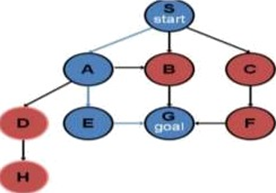



In [ ]:
#1a. Breadth First Search
graph = {
'S': ['A','B','C'],
'A': ['D','E','B'],
'B': ['G'],
'C': ['F'],
'D': ['H'],
'E': ['G'],
'F': ['G'],
'G': [],
'H': []
}
closed = [] # List for visited nodes.
open = []     #Initialize a queue
child={}
def bfs(closed, graph, node): #function for BFS
  closed.append(node)
  open.append(node)
  i=0
  while open:          # Creating loop to visit each node
    m = open.pop(0)
    closed.append(m)
    #print (m, end = " ")
    if(m=='G'):
      break
    i=0
    for neighbour in graph[m]:
        if neighbour not in closed:
          open.append(neighbour)
        if neighbour not in child.keys():
          child[neighbour]=m
# Driver Code
print("Following is the Breadth-First Search")
bfs(closed, graph, 'S')
print("Open:",open)
print("Closed:",closed)
#print(child)
path=[]
goal="G"
path.append(goal)
while goal!="S":
  goal=child[goal]
  path.append(goal)
path.reverse()

print("Path:","->".join(path))

Following is the Breadth-First Search
Open: ['F', 'H', 'G', 'G']
Closed: ['S', 'S', 'A', 'B', 'C', 'D', 'E', 'B', 'G']
Path: S->B->G


In [ ]:
#1b.Depth First Search
graph = {
    'S': ['A', 'B', 'C'],
    'A': ['D', 'E', 'B'],
    'B': ['G'],
    'C': ['F'],
    'D': ['H'],
    'E': ['G'],
    'F': ['G'],
    'G': [],
    'H': []
}
visited = set()
open_list = []
closed_list = []
dfs_path = []
def dfs(closed, graph, node):
    open_list.append(node)
    while open_list:
        current_node = open_list.pop(0)
        closed_list.append(current_node)
        for neighbor in graph[current_node]:
            if neighbor not in open_list and neighbor not in closed_list:
                open_list.append(neighbor)
                dfs_path.append(neighbor)
        if current_node == 'G':
            break
# Driver Code
print("Following is the Depth-First Search:")
dfs(closed_list, graph, 'S')
print("DFS Path:", "->".join(['S'] + dfs_path))
print("Open List:", open_list)
print("Closed List:", closed_list)

Following is the Depth-First Search:
DFS Path: S->A->B->C->D->E->G->F->H
Open List: ['F', 'H']
Closed List: ['S', 'A', 'B', 'C', 'D', 'E', 'G']


In [ ]:
#1c Depth first Iterative Deepening
graph = {
    'S': ['A', 'B', 'C'],
    'A': ['D', 'E', 'B'],
    'B': ['G'],
    'C': ['F'],
    'D': ['H'],
    'E': ['G'],
    'F': ['G'],
    'G': [],
    'H': []
}

def iddfs(graph, start, depth):
    for d in range(depth+1):
        visited = set()
        path = []
        open_list = []
        closed_list = []
        stack = [(start, 0)]
        while stack:
            node, current_depth = stack.pop()
            path.append(node)
            visited.add(node)
            closed_list.append(node)
            if current_depth < d:
                neighbors = graph[node]
                for neighbor in neighbors:
                    if neighbor not in visited:
                        stack.append((neighbor, current_depth+1))
                        open_list.append(neighbor)
            if node == 'G':
                return path, open_list, closed_list
    return None, None, None
path, open_list, closed_list = iddfs(graph, 'S', 3)

print("Path:","->".join(path))
print("Open List:", open_list)
print("Closed List:", closed_list)

Path: S->C->F->B->G
Open List: ['A', 'B', 'C', 'F', 'G']
Closed List: ['S', 'C', 'F', 'B', 'G']


In [ ]:
#d a* using 8 tile
def heuristic(state, goal_state):
    # Calculate the Manhattan distance heuristic
    distance = 0
    for i in range(len(state)):
        if state[i] != goal_state[i]:
            distance += 1
    return distance

def a_star_search(graph, start_state, goal_state):
    open_list = [(start_state, 0)]
    closed_list = []

    while open_list:
        current_state, g_cost = min(open_list, key=lambda x: x[1] + heuristic(x[0], goal_state))
        open_list = [x for x in open_list if x[0] != current_state]
        closed_list.append(current_state)

        if current_state == goal_state:
            return closed_list

        for neighbor in graph[current_state]:
            if neighbor not in closed_list:
                open_list.append((neighbor, g_cost + 1))

    return None
# Example usage
graph = {
    'S': ['A', 'B', 'C'],
    'A': ['D', 'E', 'B'],
    'B': ['G'],
    'C': ['F'],
    'D': ['H'],
    'E': ['G'],
    'F': ['G'],
    'G': [],
    'H': []
}
start_state = 'S'
goal_state = 'G'
path = a_star_search(graph, start_state, goal_state)
print("Open List:", [x[0] for x in open_list])
print("Closed List:", closed_list)
print("Path:", "->".join(path))

Open List: ['A', 'B', 'C', 'F', 'G']
Closed List: ['S', 'C', 'F', 'B', 'G']
Path: S->A->B->C->G


2. Implement the Minimax search algorithm in game playing using recursion in Python

In [ ]:
import math

def minimax (curDepth, nodeIndex,
             maxTurn, scores,
             targetDepth):

    # base case : targetDepth reached
    if (curDepth == targetDepth):
        return scores[nodeIndex]

    if (maxTurn):
        return max(minimax(curDepth + 1, nodeIndex * 2,
                    False, scores, targetDepth),
                   minimax(curDepth + 1, nodeIndex * 2 + 1,
                    False, scores, targetDepth))

    else:
        return min(minimax(curDepth + 1, nodeIndex * 2,
                     True, scores, targetDepth),
                   minimax(curDepth + 1, nodeIndex * 2 + 1,
                     True, scores, targetDepth))

scores = [3, 5, 2, 9, 12, 5, 23, 23]

treeDepth = math.log(len(scores), 2)

print("The optimal value is : ", end = "")
print(minimax(0, 0, True, scores, treeDepth))

The optimal value is : 12


3.Implement the Eight Queens problem using constraint satisfaction algorithm using Python

In [ ]:
def is_valid(board, row, col):
    # Check if placing a queen at (row, col) violates any constraints
    for i in range(col):
        if board[row][i] == 1:
            return False
    for i, j in zip(range(row, -1, -1), range(col, -1, -1)):
        if board[i][j] == 1:
            return False
    for i, j in zip(range(row, len(board), 1), range(col, -1, -1)):
        if board[i][j] == 1:
            return False
    return True

def solve_n_queens(board, col):
    # Base case: All queens are placed
    if col >= len(board):
        return True

    for i in range(len(board)):
        if is_valid(board, i, col):
            board[i][col] = 1
            if solve_n_queens(board, col + 1):
                return True
            board[i][col] = 0

    return False

def print_board(board):
    for row in board:
        print(' '.join(str(cell) for cell in row))

def solve_eight_queens():
    board = [[0] * 8 for _ in range(8)]
    if solve_n_queens(board, 0):
        print_board(board)
    else:
        print("No solution exists.")

solve_eight_queens()

1 0 0 0 0 0 0 0
0 0 0 0 0 0 1 0
0 0 0 0 1 0 0 0
0 0 0 0 0 0 0 1
0 1 0 0 0 0 0 0
0 0 0 1 0 0 0 0
0 0 0 0 0 1 0 0
0 0 1 0 0 0 0 0


>
3.Write a program that implements Naive Bayes Machine Learning Algorithm from
scratch without using the libraries in Python. Your program should read the training and test data set files that are in the ARFF format and classify each of the instances in the test data set file. This is a binary classification problem.
>







In [15]:
def preprocess_data(data):
    preprocessed_data = []
    for instance in data:
        preprocessed_data.append(instance)
    return preprocessed_data

def read_arff(dat):
     with open(dat, 'r') as d :
          data = d.readlines()
     return data

train_data = read_arff('train.arff')
test_data = read_arff('test.arff')

preprocessed_train_data = preprocess_data(train_data)
preprocessed_test_data = preprocess_data(test_data)
def train_naive_bayes(train_data):
    separated_data = separate_by_class(train_data)
    class_probabilities = calculate_class_probabilities(train_data)
    attribute_probabilities = calculate_attribute_probabilities(separated_data)
    trained_model = {
        'class_probabilities': class_probabilities,
        'attribute_probabilities': attribute_probabilities
    }
    return trained_model

def separate_by_class(train_data):
    separated_data = {}
    for instance in train_data:
        class_label = instance[-1]
        if class_label not in separated_data:
            separated_data[class_label] = []
        separated_data[class_label].append(instance)
    return separated_data

def calculate_class_probabilities(train_data):
    class_probabilities = {}
    total_instances = len(train_data)

    for instance in train_data:
        class_label = instance[-1]
        if class_label not in class_probabilities:
            class_probabilities[class_label] = 0
        class_probabilities[class_label] += 1

    for class_label in class_probabilities:
        class_probabilities[class_label] /= total_instances

    return class_probabilities

def calculate_attribute_probabilities(separated_data):
    attribute_probabilities = {}
    for class_label, instances in separated_data.items():
        attribute_probabilities[class_label] = {}
        total_instances = len(instances)
        num_attributes = len(instances[0]) - 1
        for i in range(num_attributes):
            attribute_values = [instance[i] for instance in instances if len(instance) > i]
            attribute_probabilities[class_label][i] = {}
            for value in attribute_values:
                if value not in attribute_probabilities[class_label][i]:
                    attribute_probabilities[class_label][i][value] = 0
                attribute_probabilities[class_label][i][value] += 1
            for value in attribute_probabilities[class_label][i]:
                attribute_probabilities[class_label][i][value] /= total_instances
    return attribute_probabilities

# Example usage
naive_bayes_model = train_naive_bayes(train_data)
def classify_instances(test_data, trained_model):

    predicted_labels = []
    for instance in test_data:
        probabilities = {}
        for class_label, class_prob in trained_model['class_probabilities'].items():
            likelihood = 1.0
            for i, attribute_value in enumerate(instance[:-1]):
               if class_label in trained_model['attribute_probabilities'] and i in trained_model['attribute_probabilities'][class_label] and attribute_value in trained_model['attribute_probabilities'][class_label][i]:
                                 likelihood *= trained_model['attribute_probabilities'][class_label][i][attribute_value]
               else:
                    likelihood = 0.0
                    break
            probabilities[class_label] = class_prob * likelihood

        predicted_label = max(probabilities, key=probabilities.get)
        predicted_labels.append(predicted_label)

    return predicted_labels
actual_labels = [instance[-1] for instance in preprocessed_test_data]
#predicted_labels = classify_instances(test_data, naive_bayes_model)
predicted_labels = classify_instances(preprocessed_test_data, naive_bayes_model)
def evaluate_performance(predicted_labels, actual_labels):
    correct_predictions = 0
    total_predictions = len(predicted_labels)

    for predicted, actual in zip(predicted_labels, actual_labels):
        if predicted == actual:
            correct_predictions += 1

    accuracy = correct_predictions / total_predictions
    return accuracy

accuracy = evaluate_performance(predicted_labels, actual_labels)
print(accuracy)

0.9090909090909091


5.Students are expected to learn any one of the following:

a.	Scikit-learn (https://scikit-learn.org/) an open source machine learning Python library that supports supervised and unsupervised learning. The sklearn.datasets package embeds small toy datasets. It includes utilities to load these datasets.
Students are expected to study and make use of these datasets

b.	Weka (http://www.cs.waikato.ac.nz/ml/weka/) a widely used ML	toolkit thai supports supervised and unsupervised lemming. Weka provides various data sets in ARFF format.
Students are expected to study and make use of these datasets


#**scikit-learn -Machine Learning in Python**

*   Simple and efficient tools for predictive data analysis
*   Accessible to everybody, and reusable in various contexts
*   Built on NumPy, SciPy, and matplotlib
*  Open source, commercially usable - BSD license


#**1.Classification**-Identifying which category an object belongs to.

**Applications**: Spam detection, image recognition.

**Algorithms**: Gradient boosting, nearest neighbors, random forest, logistic
regression, and more...
>
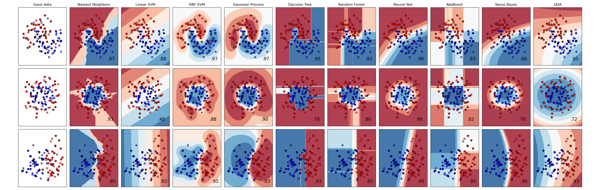

#**2.Regression**-Predicting a continuous-valued attribute associated with an object.

**Applications:** Drug response, Stock prices.

**Algorithms:** Gradient boosting, nearest neighbors, random forest, ridge, and more...
>
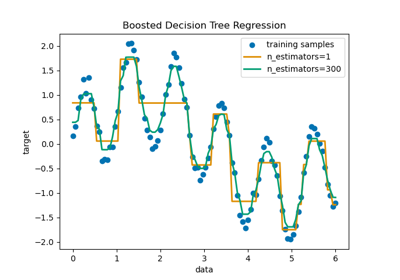

#**3. Clustering**-Automatic grouping of similar objects into sets.

**Applications:** Customer segmentation, Grouping experiment outcomes

**Algorithms:**k-Means, HDBSCAN, hierarchical clustering, and more...

>
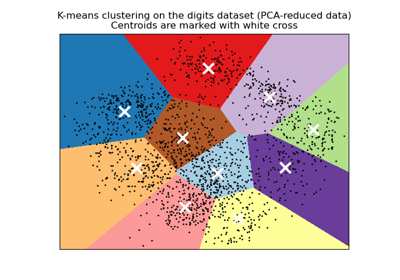

#**4.Dimensionality reduction**-Reducing the number of random variables to consider.

**Applications**: Visualization, Increased efficiency

**Algorithms:** PCA, feature selection, non-negative matrix factorization, and more...

>
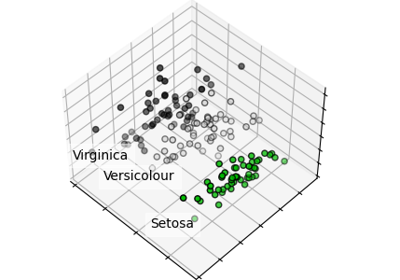


#**5.Model selection**-Comparing, validating and choosing parameters and models.

**Applications:** Improved accuracy via parameter tuning

**Algorithms:** grid search, cross validation, metrics, and more...

>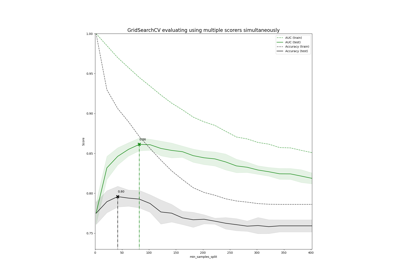




#**6.Preprocessing**-Feature extraction and normalization.

**Applications:** Transforming input data such as text for use with machine learning algorithms.

**Algorithms:** preprocessing, feature extraction, and more...

>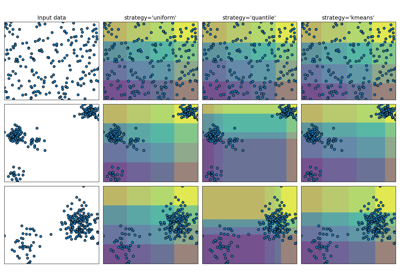



In [ ]:
from sklearn import datasets

# Load the iris dataset
iris = datasets.load_iris()

# Access the features and target variables
X = iris.data
y = iris.target

# Print the shape of the dataset
print("Shape of features:", X.shape)
print("Shape of target:", y.shape)

Shape of features: (150, 4)
Shape of target: (150,)


#**Weka-Machine Learning Software in Java**#

>
Weka is a collection of machine learning algorithms for data mining tasks. It contains tools for data preparation, classification, regression, clustering, association rules mining, and visualization.
>
Found only on the islands of New Zealand, the Weka is a flightless bird with an inquisitive nature. The name is pronounced like this, and the bird sounds like this.
>
Weka is open source software issued under the GNU General Public License.

#**Arff stable**
>
An ARFF (Attribute-Relation File Format) file is an ASCII text file that describes a list of instances sharing a set of attributes.
Overview
>
ARFF files have two distinct sections. The first section is the Header information, which is followed the Data information.
>
The Header of the ARFF file contains the name of the relation, a list of the attributes (the columns in the data), and their types. An example header on the standard IRIS dataset looks like this:
>
   % 1. Title: Iris Plants Database

   
   %
   
   % 2. Sources:
   
   %      (a) Creator: R.A. Fisher
   
   %      (b) Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)
   
   %      (c) Date: July, 1988
   
   %
   
   @RELATION iris

   
   @ATTRIBUTE sepallength  NUMERIC
   
   @ATTRIBUTE sepalwidth   NUMERIC
   
   @ATTRIBUTE petallength  NUMERIC
   
   @ATTRIBUTE petalwidth   NUMERIC
   
   @ATTRIBUTE class        {Iris-setosa,Iris-versicolor,Iris-virginica}

>
The Data of the ARFF file looks like the following:
   
   @DATA

   5.1,3.5,1.4,0.2,Iris-setosa
   
   4.9,3.0,1.4,0.2,Iris-setosa
   
   4.7,3.2,1.3,0.2,Iris-setosa
   
   4.6,3.1,1.5,0.2,Iris-setosa
   
   5.0,3.6,1.4,0.2,Iris-setosa
   
   5.4,3.9,1.7,0.4,Iris-setosa
   >
   Lines that begin with a % are comments. The @RELATION, @ATTRIBUTE and @DATA declarations are case insensitive.


6.	Write Python program to use skleam's DecisionTreeClassifier to build a decision tree for the sklearn's datasets or use Weka's J48 tree learner.

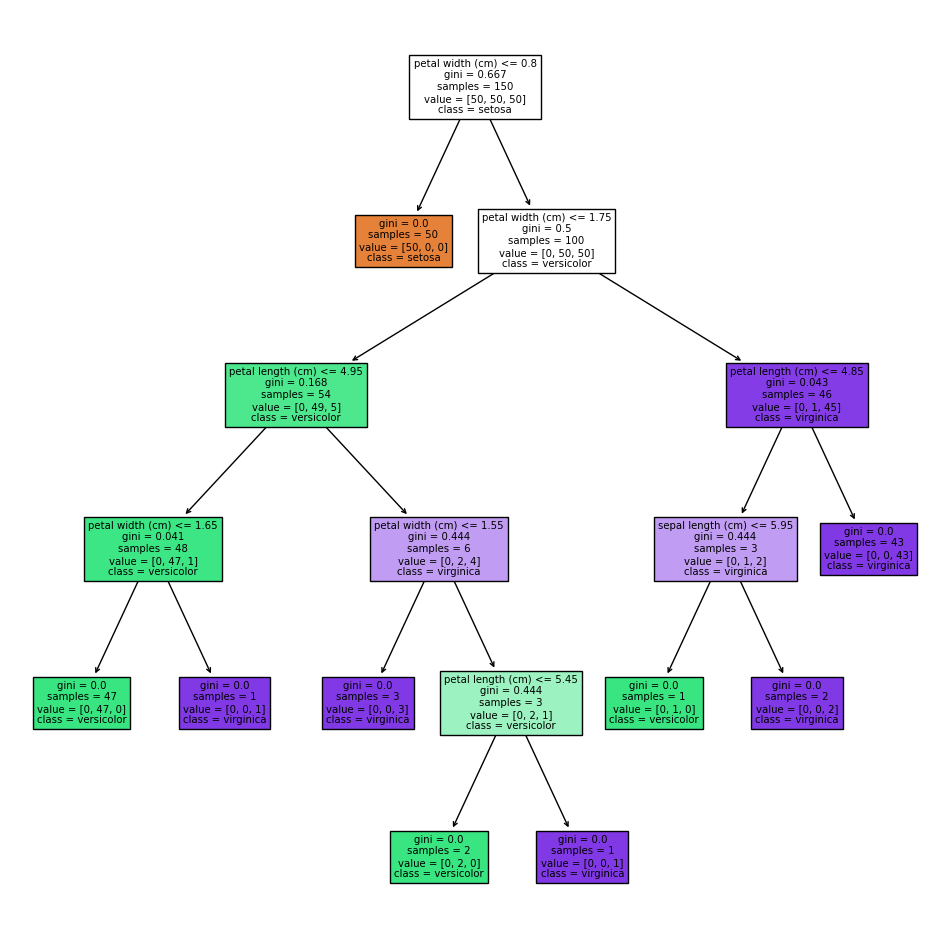

In [15]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Load the dataset
iris = load_iris()
X = iris.data
y = iris.target

# Create a DecisionTreeClassifier object
clf = DecisionTreeClassifier()

# Train the classifier
clf.fit(X, y)

# Plot the decision tree
fig, ax = plt.subplots(figsize=(12, 12))
tree.plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names, ax=ax)
plt.show()

7.	Write a Python program or use the Weko Toolkit for the K-means algorithm.

[(4, 21), (5, 19), (10, 24), (4, 17), (3, 16), (11, 25), (14, 24), (6, 22), (10, 21), (12, 21)]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

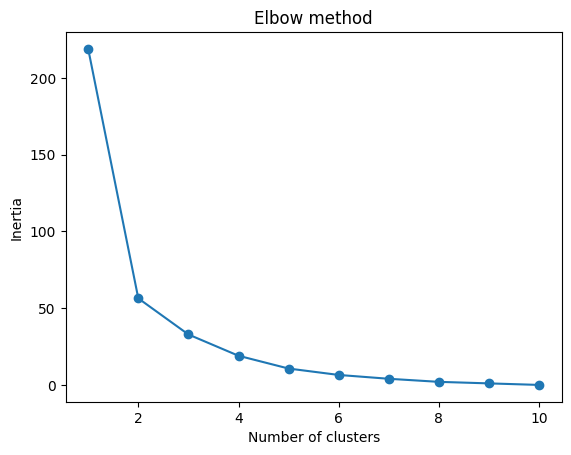

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


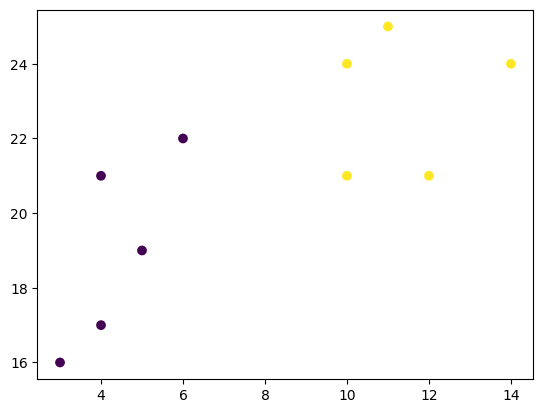

In [17]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]
data = list(zip(x, y))
print(data)
inertias = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)
plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)
plt.scatter(x, y, c=kmeans.labels_)
plt.show()

8.	Design a perceptron classifier to classify handwritten numerical digits (0-9). Implement using scikit or Weka.

In [13]:
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split

# Load the dataset
digits = load_digits()
X = digits.data
y = digits.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the perceptron classifier
clf = Perceptron()
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Output the predicted digits
print("Predicted digits:\n", y_pred)

Predicted digits:
 [6 9 3 7 2 1 5 2 5 2 1 4 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 9 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 5 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 4 4 4 4 3 5 3 1 3 5 9 4 2 7
 7 4 4 1 9 2 7 8 7 2 6 9 4 0 7 2 7 5 8 7 5 7 9 0 6 6 4 2 8 0 9 4 6 9 9 6 9
 0 5 5 6 6 0 6 4 2 9 3 8 7 2 9 0 4 5 8 6 5 8 9 8 4 2 1 3 7 7 2 2 3 9 8 0 3
 2 2 5 6 9 9 4 1 2 4 2 3 6 4 8 5 9 5 7 8 9 4 8 1 5 4 4 9 6 1 8 6 0 4 5 2 7
 4 6 4 5 6 0 3 2 3 6 7 1 5 1 4 7 6 5 1 5 5 1 5 2 8 8 9 5 7 6 2 2 2 3 4 8 8
 3 6 0 9 7 7 0 1 0 4 5 1 5 3 6 0 4 1 0 0 3 6 5 9 7 3 5 5 9 9 8 5 3 3 2 0 5
 8 3 4 0 2 4 6 4 3 4 5 0 5 2 1 3 1 4 1 1 7 0 1 5 2 1 2 8 7 0 6 4 8 4 5 1 8
 4 5 8 7 9 8 6 0 6 2 0 7 9 1 9 5 2 7 7 1 8 7 4 3 4 3 5]


9.	Write a Python program to segment a text into linguistically meaningful units, such as paragraphs, sentences. or words. For segmenting text into tokens (words and word- like units) use regular expressions.

In [ ]:
import re
def segment_text(text):
    paragraphs = re.split(r'\n\s*\n', text)
    sentences = []
    for paragraph in paragraphs:
        sentences.extend(re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s', paragraph))
    words = []
    for sentence in sentences:
        words.extend(re.findall(r'\b\w+\b', sentence))
    return paragraphs, sentences, words
text = "This is a sample text. It has multiple sentences.\n\nEach sentence contains words."
paragraphs, sentences, words = segment_text(text)
print("Paragraphs:", paragraphs)
print("Sentences:", sentences)
print("Words:", words)

Paragraphs: ['This is a sample text. It has multiple sentences.', 'Each sentence contains words.']
Sentences: ['This is a sample text.', 'It has multiple sentences.', 'Each sentence contains words.']
Words: ['This', 'is', 'a', 'sample', 'text', 'It', 'has', 'multiple', 'sentences', 'Each', 'sentence', 'contains', 'words']


10.	Write a program to label words (tokens) with parts of speech such as noun. adjective, and verb using a PoS tagger

In [ ]:
#pip install nltk
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
import nltk

def pos_tagger(text):
     # Download the missing resource
    tokens = nltk.word_tokenize(text)
    tagged_words = nltk.pos_tag(tokens)
    return tagged_words

sentence = "This is a sample sentence."
tagged_sentence = pos_tagger(sentence)
print(tagged_sentence)

[('This', 'DT'), ('is', 'VBZ'), ('a', 'DT'), ('sample', 'JJ'), ('sentence', 'NN'), ('.', '.')]
